# Step 1: Data Preparation
In this step, we will:
- Load the Diabetes dataset from `sklearn.datasets`.
- Explore its features and target values.
- Split the data into training and test sets.
- Check for missing values and handle data preparation.


Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Shape of X: (442, 10)
Shape of y: (442,)
Missing values in X:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64
Target description: Ten baseline variables, age, sex, body mass index, average blood


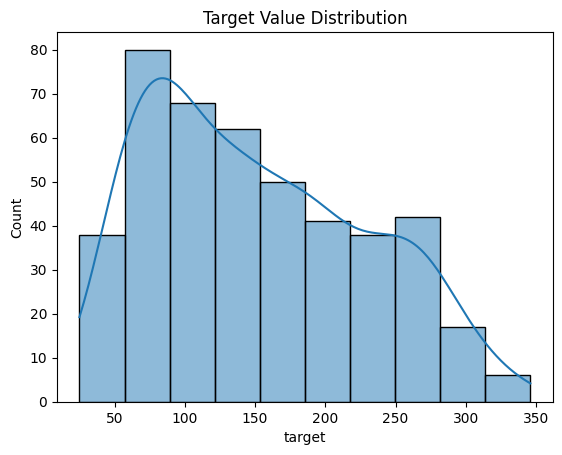

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")

# Explore dataset
print("Features:", diabetes.feature_names)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Missing values in X:\n", X.isnull().sum())
print("Target description:", diabetes.DESCR.split('\n')[5])

# Check target distribution
sns.histplot(y, kde=True)
plt.title("Target Value Distribution")
plt.show()


# Step 2: Linear Regression
We implement a Simple Linear Regression model using one feature (`bmi`) to predict the target.
We split the dataset into 80% training and 20% testing sets.
We evaluate using MAE, MSE, RMSE, and R², and plot predictions vs actual values.


Linear Regression Metrics:
MAE=52.26, MSE=4061.83, RMSE=63.73, R²=0.23


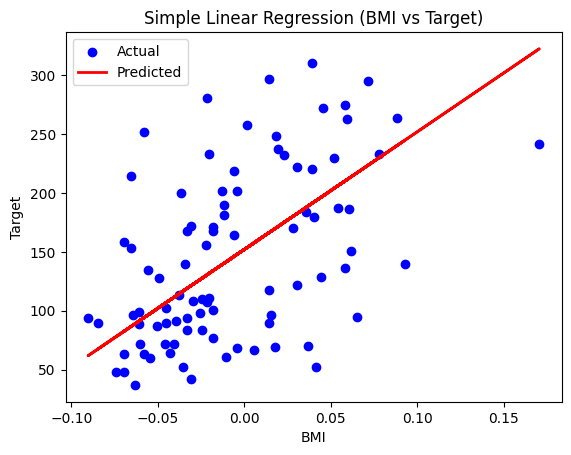

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use one feature (bmi)
X_bmi = X[["bmi"]]
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Metrics:\nMAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.2f}")

# Plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Simple Linear Regression (BMI vs Target)')
plt.legend()
plt.show()


# Step 3: Multiple Regression
We train a Multiple Regression model using all available features.
We evaluate using MAE, MSE, RMSE, and R².


Multiple Regression Metrics:
MAE=42.79, MSE=2900.19, RMSE=53.85, R²=0.45


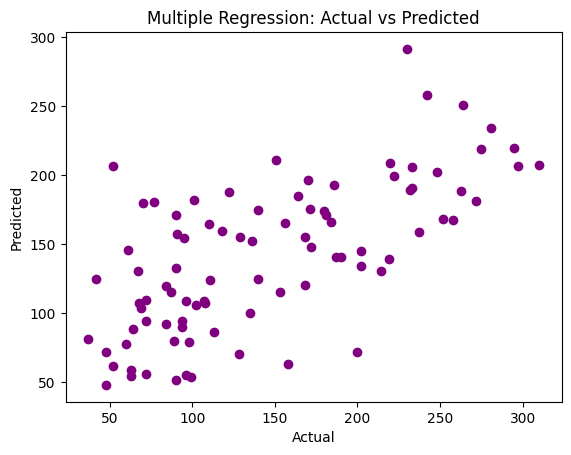

In [3]:
# Train-test split with all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Multiple Regression
mr = LinearRegression()
mr.fit(X_train, y_train)
y_pred_mr = mr.predict(X_test)

# Metrics
mae_mr = mean_absolute_error(y_test, y_pred_mr)
mse_mr = mean_squared_error(y_test, y_pred_mr)
rmse_mr = np.sqrt(mse_mr)
r2_mr = r2_score(y_test, y_pred_mr)

print(f"Multiple Regression Metrics:\nMAE={mae_mr:.2f}, MSE={mse_mr:.2f}, RMSE={rmse_mr:.2f}, R²={r2_mr:.2f}")

# Plot Actual vs Predicted
plt.scatter(y_test, y_pred_mr, color='purple')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Regression: Actual vs Predicted')
plt.show()


# Step 4: Polynomial Regression
We create polynomial features (degree=2).
We train the model and compare results with linear models.


In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Use BMI feature for polynomial regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_bmi)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train polynomial regression
poly_lr = LinearRegression()
poly_lr.fit(X_train, y_train)
y_pred_poly = poly_lr.predict(X_test)

# Metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression Metrics:\nMAE={mae_poly:.2f}, MSE={mse_poly:.2f}, RMSE={rmse_poly:.2f}, R²={r2_poly:.2f}")


Polynomial Regression Metrics:
MAE=52.38, MSE=4085.03, RMSE=63.91, R²=0.23


# Step 5: Regularization with Ridge and Lasso Regression
We apply Ridge and Lasso to prevent overfitting and compare their performance with previous models.


In [5]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Ridge Regression Metrics:\nMAE={mae_ridge:.2f}, MSE={mse_ridge:.2f}, RMSE={rmse_ridge:.2f}, R²={r2_ridge:.2f}")
print(f"Lasso Regression Metrics:\nMAE={mae_lasso:.2f}, MSE={mse_lasso:.2f}, RMSE={rmse_lasso:.2f}, R²={r2_lasso:.2f}")


Ridge Regression Metrics:
MAE=55.96, MSE=4196.98, RMSE=64.78, R²=0.21
Lasso Regression Metrics:
MAE=52.26, MSE=4056.91, RMSE=63.69, R²=0.23


# Step 6: Model Comparison and Analysis
We compare all models using MAE, MSE, RMSE, and R².
We analyze which model fits the data best and discuss overfitting and underfitting issues.


In [6]:
# Compare metrics
results = pd.DataFrame({
    'Model': ['Linear', 'Multiple', 'Polynomial', 'Ridge', 'Lasso'],
    'MAE': [mae, mae_mr, mae_poly, mae_ridge, mae_lasso],
    'MSE': [mse, mse_mr, mse_poly, mse_ridge, mse_lasso],
    'RMSE': [rmse, rmse_mr, rmse_poly, rmse_ridge, rmse_lasso],
    'R²': [r2, r2_mr, r2_poly, r2_ridge, r2_lasso]
})
print(results)


        Model        MAE          MSE       RMSE        R²
0      Linear  52.259976  4061.825928  63.732456  0.233350
1    Multiple  42.794095  2900.193628  53.853446  0.452603
2  Polynomial  52.383912  4085.025481  63.914204  0.228972
3       Ridge  55.958916  4196.977563  64.784084  0.207841
4       Lasso  52.260102  4056.909224  63.693871  0.234278
